#<center>**Case Study -2**







#About Dataset

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


**The data set includes information about:**

1)Customers who left within the last month – the column is called Churn

2)Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3)Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4)Demographic info about customers – gender, age range, and if they have partners and dependents

**Dataset link**  : https://www.kaggle.com/datasets/blastchar/telco-customer-churn/download?datasetVersionNumber=1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


**1)How many customers are present in the dataset?**


In [ ]:
#doing it using nunique instead of count to make sure no dupicates value is counted in customer.
b = '\033[1m'
r = '\033[0m'

print(f'Number of customers in dataset is {b}{df.customerID.nunique()}{r}')

Number of customers in dataset is 7043


**2)What is the distribution of gender among the customers?**


In [ ]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

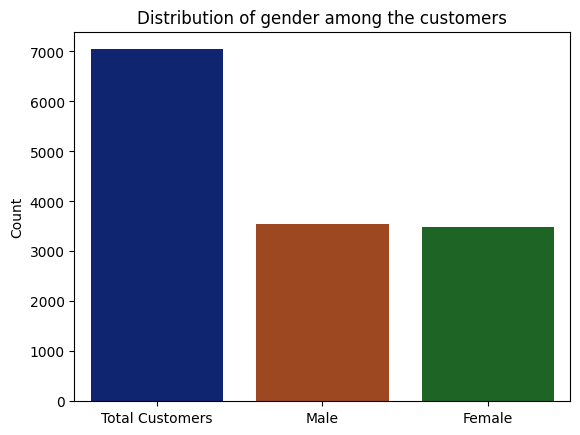

In [ ]:
total_cust = df.customerID.nunique()
male = len(df[df['gender'] == 'Male'])
female = len(df[df['gender'] == 'Female'])

x = ['Total Customers', 'Male', 'Female']
y = [total_cust, male, female]

sns.barplot(x=x, y=y, palette='dark')
plt.title('Distribution of gender among the customers')
plt.ylabel('Count')

**3)How does age vary among the customers?**


In [ ]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

**OBSERVATION :**

There are **1142 - Senior citizen** and **5901 - Non Senior citizen** out of **7043 total customers.**


In [ ]:
#Lets find out the gender variation of non senior citizen category

n = df[df['SeniorCitizen']==0]
k = n.groupby('gender')['SeniorCitizen'].count().reset_index()
k.rename(columns= {'SeniorCitizen':'Non_Senior_Citizen'})

,gender,Non_Senior_Citizen
0,Female,2920
1,Male,2981


Text(0, 0.5, 'Count')

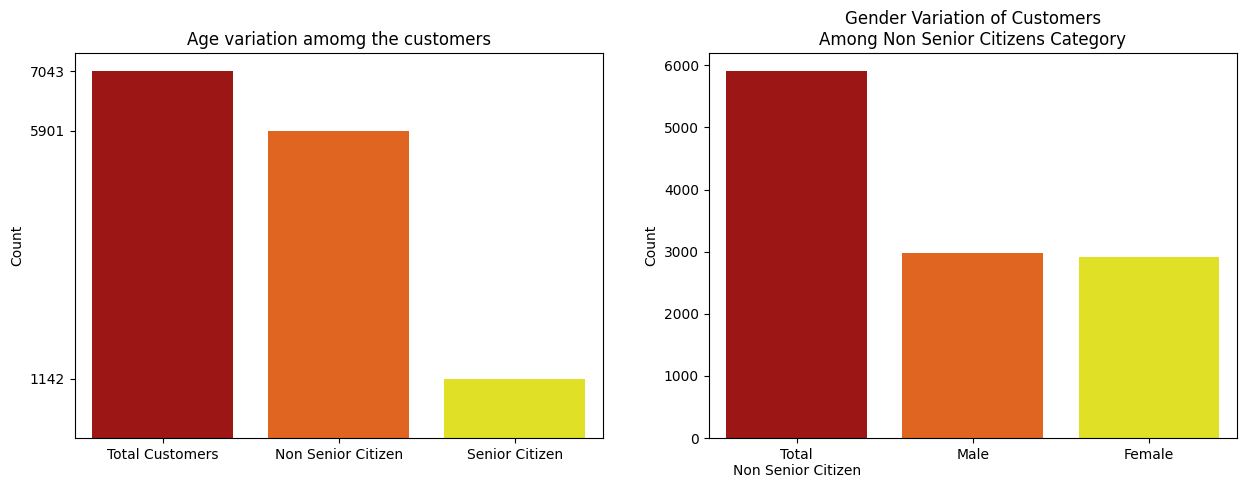

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

total_cust = df.customerID.nunique()
senior = len(df[df['SeniorCitizen'] == 1])
not_senior = len(df[df['SeniorCitizen'] == 0])

x = ['Total Customers', 'Non Senior Citizen', 'Senior Citizen']
y = [total_cust, not_senior, senior]

sns.barplot(x=x, y=y, palette='hot', ax=ax[0])
ax[0].set_title('Age variation amomg the customers')
ax[0].set_yticks(y)
ax[0].set_ylabel('Count')

non_senior = df[df['SeniorCitizen']==0]
non_senior_male = len(non_senior[non_senior['gender']=='Male'])
non_senior_female = len(non_senior[non_senior['gender']=='Female'])

k = ['Total\nNon Senior Citizen', 'Male', 'Female']
l = [not_senior, non_senior_male, non_senior_female]

sns.barplot(x=k, y=l, palette='hot', ax=ax[1])
ax[1].set_title('Gender Variation of Customers\nAmong Non Senior Citizens Category')
ax[1].set_ylabel('Count')


**4)What are the different locations from which customers belong?**


**Insufficient Data**

For (4) Que. there is no such Demographic info like Location or anything present in the Dataset.



**5)How long have customers been using the service on average?**


In [ ]:
#Finding Average service tenure for total customers
total_customer_service_tenure = np.floor(np.mean(df.tenure))
print(f'Average Time for which Customers use the various services is {b}{total_customer_service_tenure}{r} Months')

Average Time for which Customers use the various services is 32.0 Months


In [ ]:
#Finding out Averge tenure of service used by Customers gender wise
avg_tenure_gender = df.groupby('gender')['tenure'].mean().reset_index()
avg_tenure_gender.rename(columns = {'tenure':'Avg_tenure'}, inplace=True)
avg_tenure_gender

,gender,Avg_tenure
0,Female,32.244553
1,Male,32.495359


In [ ]:
#Finding out Average tenure of service used by customers age variation wise
avg_tenure_senior = df.groupby('SeniorCitizen')['tenure'].mean().reset_index()
avg_tenure_senior['SeniorCitizen'] = ['Non Senior Citizens', 'Senior Citizens']
avg_tenure_senior.rename(columns = {'tenure':'Avg_tenure', 'SeniorCitizen':'Citizen_Type'}, inplace=True)
avg_tenure_senior

,Citizen_Type,Avg_tenure
0,Non Senior Citizens,32.192171
1,Senior Citizens,33.295972


In [ ]:
#Finding out Average tenure of service used by customers who are Senior Citizens gender wise
senior_citizen = df[df['SeniorCitizen']==1]
senior_gender = senior_citizen.groupby('gender')['tenure'].mean().reset_index()
senior_gender.rename(columns = {'tenure':'Avg_tenure'}, inplace=True)
senior_gender['gender'] = ['Senior_Female','Senior_Male']
senior_gender

,gender,Avg_tenure
0,Senior_Female,32.621479
1,Senior_Male,33.963415


**6)What is the distribution of subscription types?**


In [ ]:
#distribution of subscription types
h = df.Contract.value_counts().reset_index()
h.rename(columns = {'index':'Subscription_type', 'Contract':'Count'}, inplace=True)
h

,Subscription_type,Count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


**OBSERVATION :**

**=>**The distribution of subscription type is among **'Month-to-month', 'Two year'** and **'One year'**  


**=>**Here we can see that Most of the customer have choosen **Month-to-month (3875)** type mostly as comaperd to **Two year (1695)** type and **One year (1473)** type.

Text(0.5, 1.0, 'Distribution of subscription types')

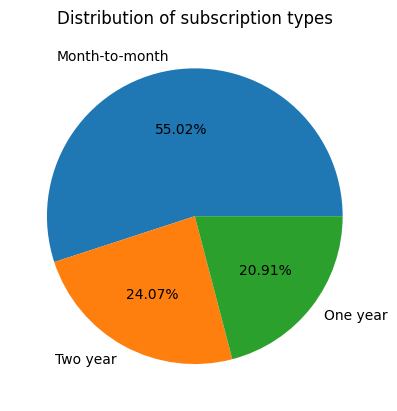

In [ ]:
plt.pie('Count', autopct='%0.2f%%', labels='Subscription_type', data=h)
plt.title('Distribution of subscription types')

**7)What is the average monthly charge incurred by customers?**


In [ ]:
#Average Monthly charges incurred by customers
avg_m = np.round(np.mean(df.MonthlyCharges),2)
print(f'Average Monthly charges incurred by customers is {b}{avg_m}{r}')

Average Monthly charges incurred by customers is 64.76


In [ ]:
#Finding out Averge monthly charges incurred by Customers gender wise
avg_monthly_gender = df.groupby('gender')['MonthlyCharges'].mean().reset_index()
avg_monthly_gender.rename(columns = {'MonthlyCharges':'Avg_MonthlyCharges'}, inplace=True)
avg_monthly_gender

,gender,Avg_MonthlyCharges
0,Female,65.204243
1,Male,64.327482


In [ ]:
#Finding out Average monthly charges incurred by customers age variation wise
avg_monthly_senior = df.groupby('SeniorCitizen')['MonthlyCharges'].mean().reset_index()
avg_monthly_senior['SeniorCitizen'] = ['Non Senior Citizens', 'Senior Citizens']
avg_monthly_senior.rename(columns = {'MonthlyCharges':'Avg_MonthlyCharges', 'SeniorCitizen':'Citizen_Type'}, inplace=True)
avg_monthly_senior

,Citizen_Type,Avg_MonthlyCharges
0,Non Senior Citizens,61.847441
1,Senior Citizens,79.820359


In [ ]:
#Finding out Average monthly charges incurred by customers who are Senior Citizens --> gender wise
senior_citizens = df[df['SeniorCitizen']==1]
senior_genders = senior_citizens.groupby('gender')['MonthlyCharges'].mean().reset_index()
senior_genders.rename(columns = {'MonthlyCharges':'Avg_MonthlyCharges'}, inplace=True)
senior_genders['gender'] = ['Senior_Female','Senior_Male']
senior_genders

,gender,Avg_MonthlyCharges
0,Senior_Female,81.109771
1,Senior_Male,78.544425


In [ ]:
print(f'{b}SUMMARY{r}\n')
print(f'Average Monthly charges incurred by Total customers {b}{avg_m}{r}')
print(f'{b}---------------------------------------------------------------------------{r}')
print(f'Average Monthly charges incurred by Female customers {b}{np.round(avg_monthly_gender.Avg_MonthlyCharges[0],2)}{r}')
print(f'Average Monthly charges incurred by Male customers {b}{np.round(avg_monthly_gender.Avg_MonthlyCharges[1],2)}{r}')
print(f'{b}---------------------------------------------------------------------------{r}')
print(f'Average Monthly charges incurred by Senior Citizen customers {b}{np.round(avg_monthly_senior.Avg_MonthlyCharges[1],2)}{r}')
print(f'Average Monthly charges incurred by Senior Citizen Female customers {b}{np.round(senior_genders.Avg_MonthlyCharges[0],2)}{r}')
print(f'Average Monthly charges incurred by Senior Citizen Male customers {b}{np.round(senior_genders.Avg_MonthlyCharges[1],2)}{r}')
print(f'{b}---------------------------------------------------------------------------{r}')
print(f'Average Monthly charges incurred by Non-Senior Citizen customers {b}{np.round(avg_monthly_senior.Avg_MonthlyCharges[0],2)}{r}')


SUMMARY

Average Monthly charges incurred by Total customers 64.76
---------------------------------------------------------------------------
Average Monthly charges incurred by Female customers 65.2
Average Monthly charges incurred by Male customers 64.33
---------------------------------------------------------------------------
Average Monthly charges incurred by Senior Citizen customers 79.82
Average Monthly charges incurred by Senior Citizen Female customers 81.11
Average Monthly charges incurred by Senior Citizen Male customers 78.54
---------------------------------------------------------------------------
Average Monthly charges incurred by Non-Senior Citizen customers 61.85


**8)What is the range of total charges accumulated by customers?**


In [ ]:
#Total charges column data type is object
#cleaning andconverting the column to float dtype

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
#Range of total charges accumulated by customers
df.head()
print(f'The range of total charges accumulated by customers varies from {b}{min(df.TotalCharges)}{r} to {b}{max(df.TotalCharges)}{r}')

The range of total charges accumulated by customers varies from 18.8 to 8684.8


In [ ]:
#Infromation of the customer from whom minimum charge has been accumulated
df[df['TotalCharges'] == min(df.TotalCharges)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.8,18.8,No


In [ ]:
#Infromation of the customer from whom maximum charge has been accumulated.
df[df['TotalCharges'] == max(df.TotalCharges)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


In [ ]:
#Finding out Total charges Accumulated by Customers gender wise
total_charges_gender = df.groupby('gender')['TotalCharges'].sum().reset_index()
total_charges_gender

,gender,TotalCharges
0,Female,7952354.2
1,Male,8103814.5


In [ ]:
#Finding out Total charges Accumulated by customers age variation wise
total_charges_senior = df.groupby('SeniorCitizen')['TotalCharges'].sum().reset_index()
total_charges_senior['SeniorCitizen'] = ['Non Senior Citizens', 'Senior Citizens']
total_charges_senior.rename(columns = {'SeniorCitizen':'Citizen_Type'}, inplace=True)
total_charges_senior

,Citizen_Type,TotalCharges
0,Non Senior Citizens,12846617.45
1,Senior Citizens,3209551.25


In [ ]:
#Finding out Total charges Accumulated by customers who are Senior Citizens --> gender wise
seniors_citizen = df[df['SeniorCitizen']==1]
senior_genders_total = seniors_citizen.groupby('gender')['TotalCharges'].sum().reset_index()
senior_genders_total['gender'] = ['Senior_Female','Senior_Male']
senior_genders_total

,gender,TotalCharges
0,Senior_Female,1613082.55
1,Senior_Male,1596468.70


In [ ]:
print(f'{b}SUMMARY{r}\n')
print(f'The range of total charges accumulated by customers varies from {b}{min(df.TotalCharges)}{r} to {b}{max(df.TotalCharges)}{r}')
print(f'{b}---------------------------------------------------------------------------------------{r}')
print(f'Total Charges accumulated from female customers : {b}{np.round(total_charges_gender.TotalCharges[0],2)}{r}')
print(f'Total Charges accumulated from Male customers : {b}{np.round(total_charges_gender.TotalCharges[1],2)}{r}')
print(f'{b}---------------------------------------------------------------------------------------{r}')
print(f'Total Charges accumulated from Senior Citizen customers : {b}{np.round(total_charges_senior.TotalCharges[1],2)}{r}')
print(f'Total Charges accumulated from Female Senior Citizen customers : {b}{np.round(senior_genders_total.TotalCharges[0],2)}{r}')
print(f'Total Charges accumulated from Male Senior Citizen customers : {b}{np.round(senior_genders_total.TotalCharges[1],2)}{r}')
print(f'{b}---------------------------------------------------------------------------------------{r}')
print(f'Total Charges accumulated from Non-Senior Citizen customers : {b}{np.round(total_charges_senior.TotalCharges[0],2)}{r}')

SUMMARY

The range of total charges accumulated by customers varies from 18.8 to 8684.8
---------------------------------------------------------------------------------------
Total Charges accumulated from female customers : 7952354.2
Total Charges accumulated from Male customers : 8103814.5
---------------------------------------------------------------------------------------
Total Charges accumulated from Senior Citizen customers : 3209551.25
Total Charges accumulated from Female Senior Citizen customers : 1613082.55
Total Charges accumulated from Male Senior Citizen customers : 1596468.7
---------------------------------------------------------------------------------------
Total Charges accumulated from Non-Senior Citizen customers : 12846617.45


**9)How many customers have churned?**


In [ ]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
total_churn = len(df[df['Churn']=='Yes'])
print(f'Number of Customres Churned is {b}{total_churn}{r}')

Number of Customres Churned is 1869


**10)What is the churn rate in the dataset?**


In [ ]:
churn_rate  = (total_churn*100)/len(df['Churn'])

In [ ]:
ch = df[df['Churn']=='Yes']
ch_gender = ch.groupby('gender')['Churn'].size().reset_index()
ch_gender.rename(columns={'Churn': 'No._of_cust_churn'}, inplace=True)
ch_gender['Churn_rate'] = (np.round((ch_gender['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
ch_gender

,gender,No._of_cust_churn,Churn_rate
0,Female,939,13.33%
1,Male,930,13.2%


In [ ]:
s_ch = df[(df['SeniorCitizen']==1) & (df['Churn']=='Yes')]
s_churned = s_ch.groupby('gender')['Churn'].size().reset_index()
s_churned['gender'] = ['Senior_Female','Senior_Male']
s_churned.rename(columns={'Churn': 'No._of_cust_churn', 'SeniorCitizen':'Citizen_Type'}, inplace=True)
s_churned['Churn_rate'] = (np.round((s_churned['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
s_churned

,gender,No._of_cust_churn,Churn_rate
0,Senior_Female,240,3.41%
1,Senior_Male,236,3.35%


In [ ]:
print(f'Churn rate of {b}Total customers{r} is {b}{np.round(churn_rate,2)}%{r}')
print(f'{b}----------------------------------------------------------------------{r}')
print(f'Churn rate of {b}Male customer{r} is {b}{ch_gender.Churn_rate[1]}{r}')
print(f'{b}----------------------------------------------------------------------{r}')
print(f'Churn rate of {b}Female customer{r} is {b}{ch_gender.Churn_rate[0]}{r}')
print(f'{b}----------------------------------------------------------------------{r}')
print(f'Churn rate of {b}Male customer{r} under {b}Senior Citizen{r} category is {b}{s_churned.Churn_rate[1]}{r}')
print(f'{b}----------------------------------------------------------------------{r}')
print(f'Churn rate of {b}Female customer{r} under {b}Senior Citizen{r} category is {b}{s_churned.Churn_rate[0]}{r}')

Churn rate of Total customers is 26.54%
----------------------------------------------------------------------
Churn rate of Male customer is 13.2%
----------------------------------------------------------------------
Churn rate of Female customer is 13.33%
----------------------------------------------------------------------
Churn rate of Male customer under Senior Citizen category is 3.35%
----------------------------------------------------------------------
Churn rate of Female customer under Senior Citizen category is 3.41%


**11)How does churn vary across different genders?**


In [ ]:
#Lets find that out of churned customers how many are male and female
ch = df[df['Churn']=='Yes']
ch_gender = ch.groupby('gender')['Churn'].size().reset_index()
ch_gender.rename(columns={'Churn': 'No._of_cust_churn'}, inplace=True)
ch_gender['Churn_rate'] = (np.round((ch_gender['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
ch_gender

,gender,No._of_cust_churn,Churn_rate
0,Female,939,13.33%
1,Male,930,13.2%


**12)Are there any differences in churn based on the customer's age?**


In [ ]:
#Lets find out how many of churned customers were senior citizens
se_ch = df[(df['Churn']=='Yes')]
se_churned = se_ch.groupby('SeniorCitizen')['Churn'].size().reset_index()
se_churned['SeniorCitizen'] = ['Non Senior Citizens', 'Senior Citizens']
se_churned.rename(columns={'Churn': 'No._of_cust_churn'}, inplace=True)
se_churned['Churn_rate'] = (np.round((se_churned['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
se_churned

,SeniorCitizen,No._of_cust_churn,Churn_rate
0,Non Senior Citizens,1393,19.78%
1,Senior Citizens,476,6.76%


In [ ]:
#lets find out how many senior citizens who churned were male and female
s_ch = df[(df['SeniorCitizen']==1) & (df['Churn']=='Yes')]
s_churned = s_ch.groupby('gender')['Churn'].size().reset_index()
s_churned['gender'] = ['Senior_Female','Senior_Male']
s_churned.rename(columns={'Churn': 'No._of_cust_churn', 'SeniorCitizen':'Citizen_Type'}, inplace=True)
s_churned['Churn_rate'] = (np.round((s_churned['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
s_churned

,gender,No._of_cust_churn,Churn_rate
0,Senior_Female,240,3.41%
1,Senior_Male,236,3.35%


In [ ]:
#lets find out how many Non senior citizens who churned were male and female
sea_cha = df[(df['SeniorCitizen']==0) & (df['Churn']=='Yes')]
sea_churneds = sea_cha.groupby('gender')['Churn'].size().reset_index()
sea_churneds['gender'] = ['Non_Senior_Female','Non_Senior_Male']
sea_churneds.rename(columns={'Churn': 'No._of_cust_churn', 'SeniorCitizen':'Citizen_Type'}, inplace=True)
sea_churneds['Churn_rate'] = (np.round((sea_churneds['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
sea_churneds

,gender,No._of_cust_churn,Churn_rate
0,Non_Senior_Female,699,9.92%
1,Non_Senior_Male,694,9.85%


**13)Are customers from specific locations more likely to churn?**


**Insufficient Data**

For (13) Que. there is no such Demographic info like Location or anything present in the Dataset.



**14)Does the subscription type influence customer churn?**


In [ ]:
c_ch = df[(df['Churn']=='Yes')]
q = c_ch.groupby('Contract')['gender'].count().reset_index()
q.rename(columns={'gender':'Customers_churned','Contract':'Subscription_type'}, inplace=True)
q

,Subscription_type,Customers_churned
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
c_ch = df[(df['Churn']=='Yes')]
pd.crosstab(c_ch.gender, c_ch.Contract, margins=True)

Contract,Month-to-month,One year,Two year,All
gender,,,,
Female,842,75,22,939
Male,813,91,26,930
All,1655,166,48,1869


**OBSERVATION :**

**Yes, as observed from both the table above we can say that subscription type influences the customer churn.**

**=>**Customers with **Month-to-month** subscription plan are more likely to churn, as compared to customers with other type of subscription plan **(One year, Two year).**



**15)Is there any correlation between monthly charges and total charges?**

In [ ]:
correlation = df.corr()
correlation

<ipython-input-421-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


**Yes there exist a correlation between monthly charges and total charges**

**1)** Correlation Type **->** Linear.

**2)** Directionality **->** Positive.

**3)** Correleation coefficient **->** 0.65

**4)** Strength of Correlation **->** Strong


Text(0.5, 1.0, 'Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')

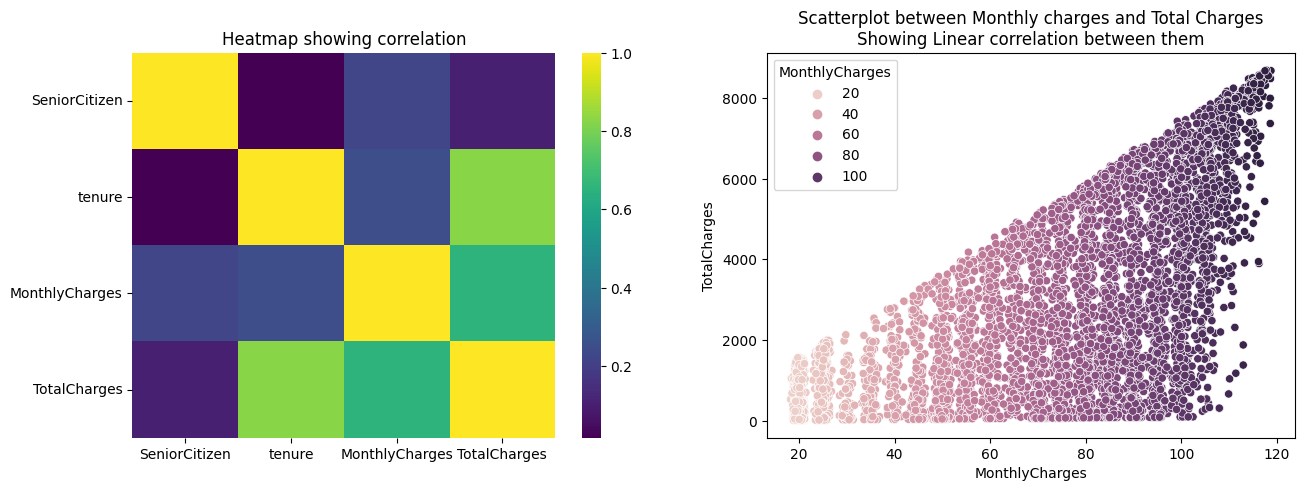

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.heatmap(correlation, cmap='viridis',ax=ax[0])
ax[0].set_title('Heatmap showing correlation')

sns.scatterplot(x='MonthlyCharges',y='TotalCharges', data=df,ax=ax[1], hue='MonthlyCharges')
ax[1].set_title('Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')